# Imports

In [3]:
import numpy as np
import os
import sys
import pickle
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from pycirclize import Circos
from pycirclize.parser import Matrix

import networkx as nx

## Helper Functions

In [4]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)

import fixedDensity as fd

# Set Directory Paths

In [5]:
# Directory path to load formatted Layer Data
%store -r layer_dataDir

# Directory path to save Calcualted Analysis Data
%store -r layer_CalData

# Directory path to save Figures
%store -r layer_Fig

# Loading

## Loading Covariance Matrices

In [6]:
# cov_NeuN_dict
with open(os.path.join(layer_CalData, 'cov_NeuN_dict.pkl'), 'rb') as f:
    cov_NeuN_dict = pickle.load(f)
f.close()

# cov_NeuN_dict_w
with open(os.path.join(layer_CalData, 'cov_NeuN_dict_w.pkl'), 'rb') as f:
    cov_NeuN_dict_w = pickle.load(f)
f.close()

## Loading Layer Neuron Labels (NeuN)

In [7]:
NeuN_Labels = ['L23_1(Cingulate)', 'L23_2(Cingulate)', 'L23_3d(Paracingulate)', 'L23_3v(Paracingulate)', 'L23_4(Rectus)', 'L23_5(Middle Frontal)', 
               'L56_1(Cingulate)', 'L56_2(Cingulate)', 'L56_3d(Paracingulate)', 'L56_3v(Paracingulate)', 'L56_4(Rectus)', 'L56_5(Middle Frontal)']

# Sub-Track Condition

In [8]:
def condition(source, target, name):
    if name == 'canonical':
        # longer_canon
        cond = ((source == 'L23_2(Cingulate)') & (target == 'L56_1(Cingulate)') | 
                (source == 'L23_3d(Paracingulate)') & (target == 'L56_2(Cingulate)') |
                (source == 'L23_3v(Paracingulate)') & (target == 'L56_2(Cingulate)') |

                (source == 'L23_3d(Paracingulate)') & (target == 'L56_1(Cingulate)') | 
                (source == 'L23_3v(Paracingulate)') & (target == 'L56_1(Cingulate)') | 
                (source == 'L23_4(Rectus)') & (target == 'L56_1(Cingulate)') | 
                (source == 'L23_5(Middle Frontal)') & (target == 'L56_1(Cingulate)') |
                (source == 'L23_4(Rectus)') & (target == 'L56_2(Cingulate)') |
                (source == 'L23_5(Middle Frontal)') & (target == 'L56_2(Cingulate)') |
                (source == 'L23_4(Rectus)') & (target == 'L56_3d(Paracingulate)') |
                (source == 'L23_4(Rectus)') & (target == 'L56_3v(Paracingulate)') |
                (source == 'L23_5(Middle Frontal)') & (target == 'L56_3d(Paracingulate)') |
                (source == 'L23_5(Middle Frontal)') & (target == 'L56_3v(Paracingulate)'))

    elif name == 'noncanonical':
        # long_noncanon
        cond = ((source == 'L23_1(Cingulate)') & (target == 'L56_2(Cingulate)') | 
                (source == 'L23_2(Cingulate)') & (target == 'L56_3d(Paracingulate)') |
                (source == 'L23_2(Cingulate)') & (target == 'L56_3v(Paracingulate)') |

                (source == 'L23_1(Cingulate)') & (target == 'L56_3d(Paracingulate)') |
                (source == 'L23_1(Cingulate)') & (target == 'L56_3v(Paracingulate)') | 
                (source == 'L23_1(Cingulate)') & (target == 'L56_4(Rectus)') | 
                (source == 'L23_1(Cingulate)') & (target == 'L56_5(Middle Frontal)') |
                (source == 'L23_2(Cingulate)') & (target == 'L56_4(Rectus)') |
                (source == 'L23_2(Cingulate)') & (target == 'L56_5(Middle Frontal)') |
                (source == 'L23_3d(Paracingulate)') & (target == 'L56_4(Rectus)') |
                (source == 'L23_3v(Paracingulate)') & (target == 'L56_4(Rectus)') |
                (source == 'L23_3d(Paracingulate)') & (target == 'L56_5(Middle Frontal)') |
                (source == 'L23_3v(Paracingulate)') & (target == 'L56_5(Middle Frontal)') | ##
                (source == 'L23_1(Cingulate)') & (target == 'L23_3d(Paracingulate)') | 
                (source == 'L23_1(Cingulate)') & (target == 'L23_3v(Paracingulate)') | 
                (source == 'L23_1(Cingulate)') & (target == 'L23_4(Rectus)') | 
                (source == 'L23_1(Cingulate)') & (target == 'L23_5(Middle Frontal)') | 
                (source == 'L23_2(Cingulate)') & (target == 'L23_4(Rectus)') | 
                (source == 'L23_2(Cingulate)') & (target == 'L23_5(Middle Frontal)') | 
                (source == 'L23_3d(Paracingulate)') & (target == 'L23_4(Rectus)') |
                (source == 'L23_3v(Paracingulate)') & (target == 'L23_4(Rectus)') | 
                (source == 'L23_3d(Paracingulate)') & (target == 'L23_5(Middle Frontal)') |
                (source == 'L23_3v(Paracingulate)') & (target == 'L23_5(Middle Frontal)') | ##
                (source == 'L56_1(Cingulate)') & (target == 'L56_3d(Paracingulate)') |
                (source == 'L56_1(Cingulate)') & (target == 'L56_3v(Paracingulate)') | 
                (source == 'L56_1(Cingulate)') & (target == 'L56_4(Rectus)') |
                (source == 'L56_1(Cingulate)') & (target == 'L56_5(Middle Frontal)') |
                (source == 'L56_2(Cingulate)') & (target == 'L56_4(Rectus)') |
                (source == 'L56_2(Cingulate)') & (target == 'L56_5(Middle Frontal)') |
                (source == 'L56_3d(Paracingulate)') & (target == 'L56_4(Rectus)') |
                (source == 'L56_3v(Paracingulate)') & (target == 'L56_4(Rectus)') |
                (source == 'L56_3d(Paracingulate)') & (target == 'L56_5(Middle Frontal)') |
                (source == 'L56_3v(Paracingulate)') & (target == 'L56_5(Middle Frontal)')
                )

    elif name == 'short':
        # short
        cond = ((source == 'L23_1(Cingulate)') & (target == 'L23_2(Cingulate)') | 
                (source == 'L23_2(Cingulate)') & (target == 'L23_3d(Paracingulate)') |
                (source == 'L23_2(Cingulate)') & (target == 'L23_3v(Paracingulate)') |
                (source == 'L56_1(Cingulate)') & (target == 'L56_2(Cingulate)') |
                (source == 'L56_2(Cingulate)') & (target == 'L56_3d(Paracingulate)') |
                (source == 'L56_2(Cingulate)') & (target == 'L56_3v(Paracingulate)') |
                
                (source == 'L23_1(Cingulate)') & (target == 'L56_1(Cingulate)') | 
                (source == 'L23_2(Cingulate)') & (target == 'L56_2(Cingulate)') | 
                (source == 'L23_3d(Paracingulate)') & (target == 'L56_3d(Paracingulate)') | 
                (source == 'L23_3v(Paracingulate)') & (target == 'L56_3v(Paracingulate)') | 
                (source == 'L23_4(Rectus)') & (target == 'L56_4(Rectus)') | 
                (source == 'L23_5(Middle Frontal)') & (target == 'L56_5(Middle Frontal)'))

    else:
        raise ValueError('Condition Not Defined')
    
    return cond

# Draw Graph Networks (NeuN)

## Define Variables

### Set fixed density value 

In [9]:
fd_val = 10

### Label Order

In [10]:
order = ['L23_5(Middle Frontal)',
         'L23_4(Rectus)',
         'L23_3v(Paracingulate)', 
         'L23_3d(Paracingulate)',
         'L23_2(Cingulate)',
         'L23_1(Cingulate)',
         'L56_1(Cingulate)',
         'L56_2(Cingulate)',
         'L56_3d(Paracingulate)',
         'L56_3v(Paracingulate)', 
         'L56_4(Rectus)',
         'L56_5(Middle Frontal)']

### Dataset to Use

In [11]:
# Variable setting
neuron_type = "NeuN"
cov_dict = cov_NeuN_dict
data_label = NeuN_Labels

In [12]:
def chordPlot(covMat, data_label, figTitle, fig_type, sub_path = False, sub_path_type = '', ax=None):
    # Substitute NaN values in covMat to 0
    covMat[np.isnan(covMat)] = 0

    # Get upper triangle of covMat
    covMat = np.triu(covMat)

    # Get graph of covMat
    G = nx.Graph(covMat)

    # Creating a mapping from old labels (0-11) to new labels (SMI32_Labels)
    mapping = {old_label: new_label for old_label, new_label in zip(range(12), data_label)}

    # Relabeling the nodes
    G = nx.relabel_nodes(G, mapping)

    # Orderd Positioning the nodes in a circle
    pos = { 'L23_5(Middle Frontal)': np.array([1.00000000e+00, 1.97028653e-08]),
            'L23_4(Rectus)': np.array([0.86602539, 0.50000001]),
            'L23_3v(Paracingulate)': np.array([0.49999998, 0.86602545]),
            'L23_3d(Paracingulate)': np.array([-2.36778241e-08,  1.00000000e+00]),
            'L23_2(Cingulate)': np.array([-0.50000003,  0.86602539]),
            'L23_1(Cingulate)': np.array([-0.86602535,  0.50000007]),
            'L56_1(Cingulate)': np.array([-9.99999960e-01, -6.77199095e-08]),
            'L56_2(Cingulate)': np.array([-0.86602541, -0.49999994]),
            'L56_3d(Paracingulate)': np.array([-0.49999988, -0.86602541]),
            'L56_3v(Paracingulate)': np.array([ 3.19584437e-08, -9.99999960e-01]),
            'L56_4(Rectus)': np.array([ 0.49999992, -0.86602541]),
            'L56_5(Middle Frontal)': np.array([ 0.86602533, -0.50000015])}

    # Define the angle in radians for the clockwise rotation (30 degrees)
    angle = np.radians(15)

    # Perform the rotation for each position
    rotated_pos = {}
    for key, value in pos.items():
        x = value[0]
        y = value[1]
        new_x = x * np.cos(angle) - y * np.sin(angle)
        new_y = x * np.sin(angle) + y * np.cos(angle)
        rotated_pos[key] = np.array([new_x, new_y])

    # Drawing the graph
    fig = plt.figure(figsize=(13, 13))
    edges = G.edges()
    weights = [G[u][v]['weight'] for u,v in edges]

    # Inverse because p_val
    pval_weights = [1 / x for x in weights]

    # Normalizing edge weights for color mapping
    weights_normalized = (pval_weights - np.min(pval_weights)) / (np.max(pval_weights) - np.min(pval_weights))
    colors = plt.cm.Reds(weights_normalized)
    
    if fig_type == 'cmp':
        # Use the provided ax for plotting instead of creating a new figure
        plt.sca(ax)

        if not sub_path: # Whole
            nx.draw_networkx_nodes(G, rotated_pos, node_color='skyblue', node_size=700)
            nx.draw_networkx_labels(G, rotated_pos)
            nx.draw_networkx_edges(G, rotated_pos, edge_color=colors, width=10*np.abs(weights_normalized))


        else: # Subpaths
            # Get the list of edges from the graph
            edge_list = list(G.edges(data=True))

            # Iterate through each edge to apply conditions
            for idx, (u, v, data) in enumerate(edge_list):

                # Apply condition - Change color and width for edges with weight above a threshold
                if condition(u, v, sub_path_type): # Condition is met
                    # Draw each edge individually
                    nx.draw_networkx_edges(G, rotated_pos, edgelist=[(u, v)], edge_color=colors[idx], width=10*np.abs(weights_normalized[idx]))

            nx.draw_networkx_nodes(G, rotated_pos, node_color='skyblue', node_size=700)
            nx.draw_networkx_labels(G, rotated_pos)

        ax.set_title(figTitle)
    
    #plt.show()
    return fig


## HC > TAU

/var/folders/d_/hlp96bh14c98xy43dzm6gp6c0000gn/T/ipykernel_55977/2915117916.py:62: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, rotated_pos, edge_color=colors, width=10*np.abs(weights_normalized))


<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

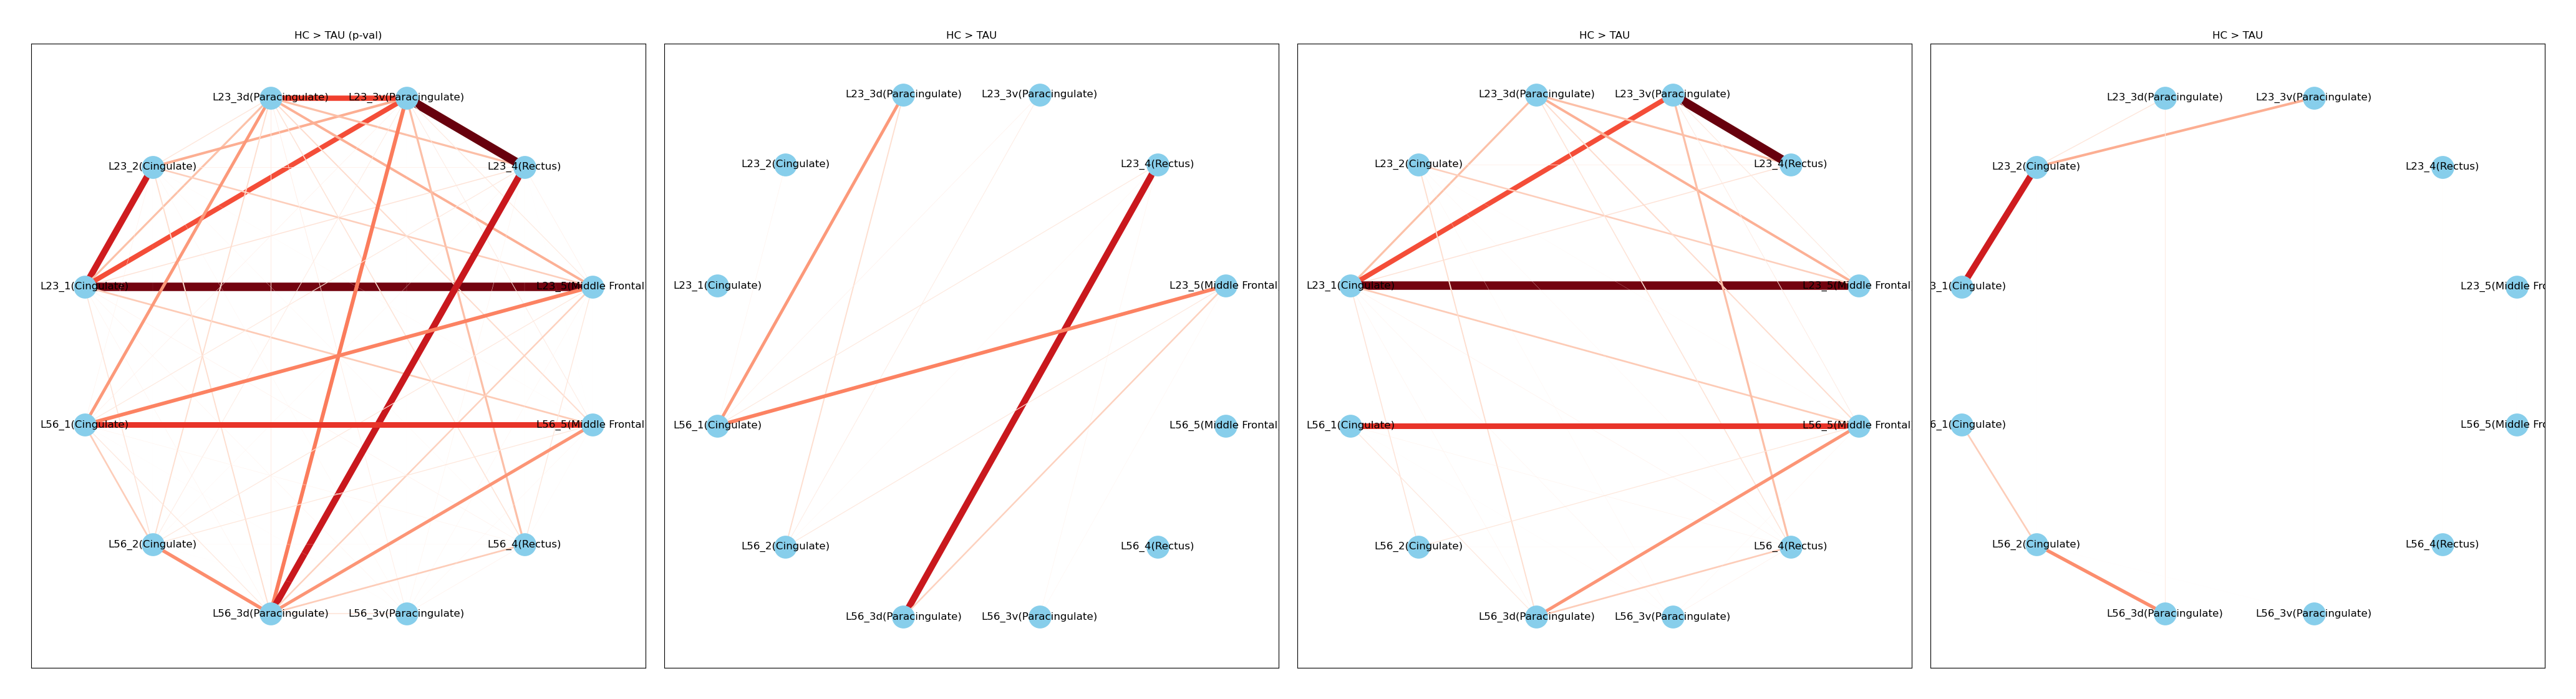

In [13]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
chordPlot(cov_dict['TAU_lt_HC_raw'], data_label, 'HC > TAU (p-val)', 'cmp', ax=axs[0])
chordPlot(cov_dict['TAU_lt_HC_raw'], data_label, 'HC > TAU', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1])
chordPlot(cov_dict['TAU_lt_HC_raw'], data_label, 'HC > TAU', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2])
chordPlot(cov_dict['TAU_lt_HC_raw'], data_label, 'HC > TAU', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3])

plt.savefig(layer_Fig + '/NeuN_HC > TAU(p-val).png')

# Show or save the final concatenated figure
plt.show()



In [16]:
pd.DataFrame(cov_dict['HC'], index=data_label, columns = data_label)

,L23_1(Cingulate),L23_2(Cingulate),L23_3d(Paracingulate),L23_3v(Paracingulate),L23_4(Rectus),L23_5(Middle Frontal),L56_1(Cingulate),L56_2(Cingulate),L56_3d(Paracingulate),L56_3v(Paracingulate),L56_4(Rectus),L56_5(Middle Frontal)
L23_1(Cingulate),NaN,0.774095,0.701916,0.857940,0.543478,0.734292,0.488278,0.661307,0.540666,0.353120,0.427495,0.531323
L23_2(Cingulate),0.774095,NaN,0.852076,0.763287,0.676463,0.674132,0.471283,0.739357,0.659718,0.506695,0.570747,0.452047
L23_3d(Paracingulate),0.701916,0.852076,NaN,0.757203,0.712417,0.647437,0.713911,0.786929,0.833346,0.435402,0.642095,0.701331
L23_3v(Paracingulate),0.857940,0.763287,0.757203,NaN,0.885884,0.640576,0.410196,0.685402,0.724676,0.722640,0.801949,0.569242
L23_4(Rectus),0.543478,0.676463,0.712417,0.885884,NaN,0.768902,0.464185,0.610265,0.727932,0.667588,0.865876,0.655073
L23_5(Middle Frontal),0.734292,0.674132,0.647437,0.640576,0.768902,NaN,0.684446,0.680476,0.536529,0.542929,0.724581,0.715049
L56_1(Cingulate),0.488278,0.471283,0.713911,0.410196,0.464185,0.684446,NaN,0.818676,0.712891,0.135065,0.401286,0.715241
L56_2(Cingulate),0.661307,0.739357,0.786929,0.685402,0.610265,0.680476,0.818676,NaN,0.827010,0.478529,0.572148,0.698678
L56_3d(Paracingulate),0.540666,0.659718,0.833346,0.724676,0.727932,0.536529,0.712891,0.827010,NaN,0.545538,0.676884,0.724282
L56_3v(Paracingulate),0.353120,0.506695,0.435402,0.722640,0.667588,0.542929,0.135065,0.478529,0.545538,NaN,0.765733,0.540136


In [17]:
pd.DataFrame(cov_dict['TAU'], index=data_label, columns = data_label)

,L23_1(Cingulate),L23_2(Cingulate),L23_3d(Paracingulate),L23_3v(Paracingulate),L23_4(Rectus),L23_5(Middle Frontal),L56_1(Cingulate),L56_2(Cingulate),L56_3d(Paracingulate),L56_3v(Paracingulate),L56_4(Rectus),L56_5(Middle Frontal)
L23_1(Cingulate),NaN,0.558914,0.577389,0.634576,0.524444,0.401892,0.897129,0.646122,0.699915,0.624691,0.575524,0.399441
L23_2(Cingulate),0.558914,NaN,0.852603,0.614015,0.736779,0.590530,0.618619,0.894018,0.617918,0.730044,0.735225,0.699303
L23_3d(Paracingulate),0.577389,0.852603,NaN,0.413647,0.603955,0.460357,0.526548,0.758378,0.853860,0.548951,0.625286,0.648764
L23_3v(Paracingulate),0.634576,0.614015,0.413647,NaN,0.688328,0.671576,0.604697,0.737053,0.428174,0.902380,0.704639,0.635685
L23_4(Rectus),0.524444,0.736779,0.603955,0.688328,NaN,0.825490,0.493295,0.753901,0.464461,0.794670,0.934983,0.875119
L23_5(Middle Frontal),0.401892,0.590530,0.460357,0.671576,0.825490,NaN,0.458617,0.696719,0.414475,0.752847,0.731278,0.929535
L56_1(Cingulate),0.897129,0.618619,0.526548,0.604697,0.493295,0.458617,NaN,0.766295,0.727636,0.643532,0.578569,0.435384
L56_2(Cingulate),0.646122,0.894018,0.758378,0.737053,0.753901,0.696719,0.766295,NaN,0.711687,0.810220,0.749170,0.707838
L56_3d(Paracingulate),0.699915,0.617918,0.853860,0.428174,0.464461,0.414475,0.727636,0.711687,NaN,0.512119,0.587410,0.524211
L56_3v(Paracingulate),0.624691,0.730044,0.548951,0.902380,0.794670,0.752847,0.643532,0.810220,0.512119,NaN,0.844276,0.753125


In [14]:
import pandas as pd
pd.DataFrame(cov_dict['TAU_lt_HC_raw'], index=data_label, columns = data_label)

,L23_1(Cingulate),L23_2(Cingulate),L23_3d(Paracingulate),L23_3v(Paracingulate),L23_4(Rectus),L23_5(Middle Frontal),L56_1(Cingulate),L56_2(Cingulate),L56_3d(Paracingulate),L56_3v(Paracingulate),L56_4(Rectus),L56_5(Middle Frontal)
L23_1(Cingulate),0.000000,0.115890,0.293961,0.143555,0.469980,0.089972,0.997165,0.468342,0.747955,0.764733,0.713153,0.329044
L23_2(Cingulate),0.115890,0.000000,0.502271,0.249607,0.652137,0.341163,0.736359,0.955459,0.417224,0.807110,0.827183,0.866203
L23_3d(Paracingulate),0.293961,0.502271,0.000000,0.135830,0.290026,0.253820,0.214842,0.416941,0.583421,0.618168,0.467859,0.407218
L23_3v(Paracingulate),0.143555,0.249607,0.135830,0.000000,0.088049,0.548218,0.700275,0.596852,0.178909,0.917270,0.290439,0.591923
L23_4(Rectus),0.469980,0.652137,0.290026,0.088049,0.000000,0.677947,0.542542,0.811190,0.113211,0.749655,0.900529,0.954224
L23_5(Middle Frontal),0.089972,0.341163,0.253820,0.548218,0.677947,0.000000,0.185332,0.536037,0.350517,0.795558,0.516805,0.990508
L56_1(Cingulate),0.997165,0.736359,0.214842,0.700275,0.542542,0.185332,0.000000,0.335839,0.531139,0.893748,0.746988,0.129357
L56_2(Cingulate),0.468342,0.955459,0.416941,0.596852,0.811190,0.536037,0.335839,0.000000,0.197222,0.922163,0.850103,0.521159
L56_3d(Paracingulate),0.747955,0.417224,0.583421,0.178909,0.113211,0.350517,0.531139,0.197222,0.000000,0.463024,0.333742,0.208581
L56_3v(Paracingulate),0.764733,0.807110,0.618168,0.917270,0.749655,0.795558,0.893748,0.922163,0.463024,0.000000,0.708192,0.798445


## TAU > HC

/var/folders/d_/hlp96bh14c98xy43dzm6gp6c0000gn/T/ipykernel_53790/2915117916.py:62: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, rotated_pos, edge_color=colors, width=10*np.abs(weights_normalized))


<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

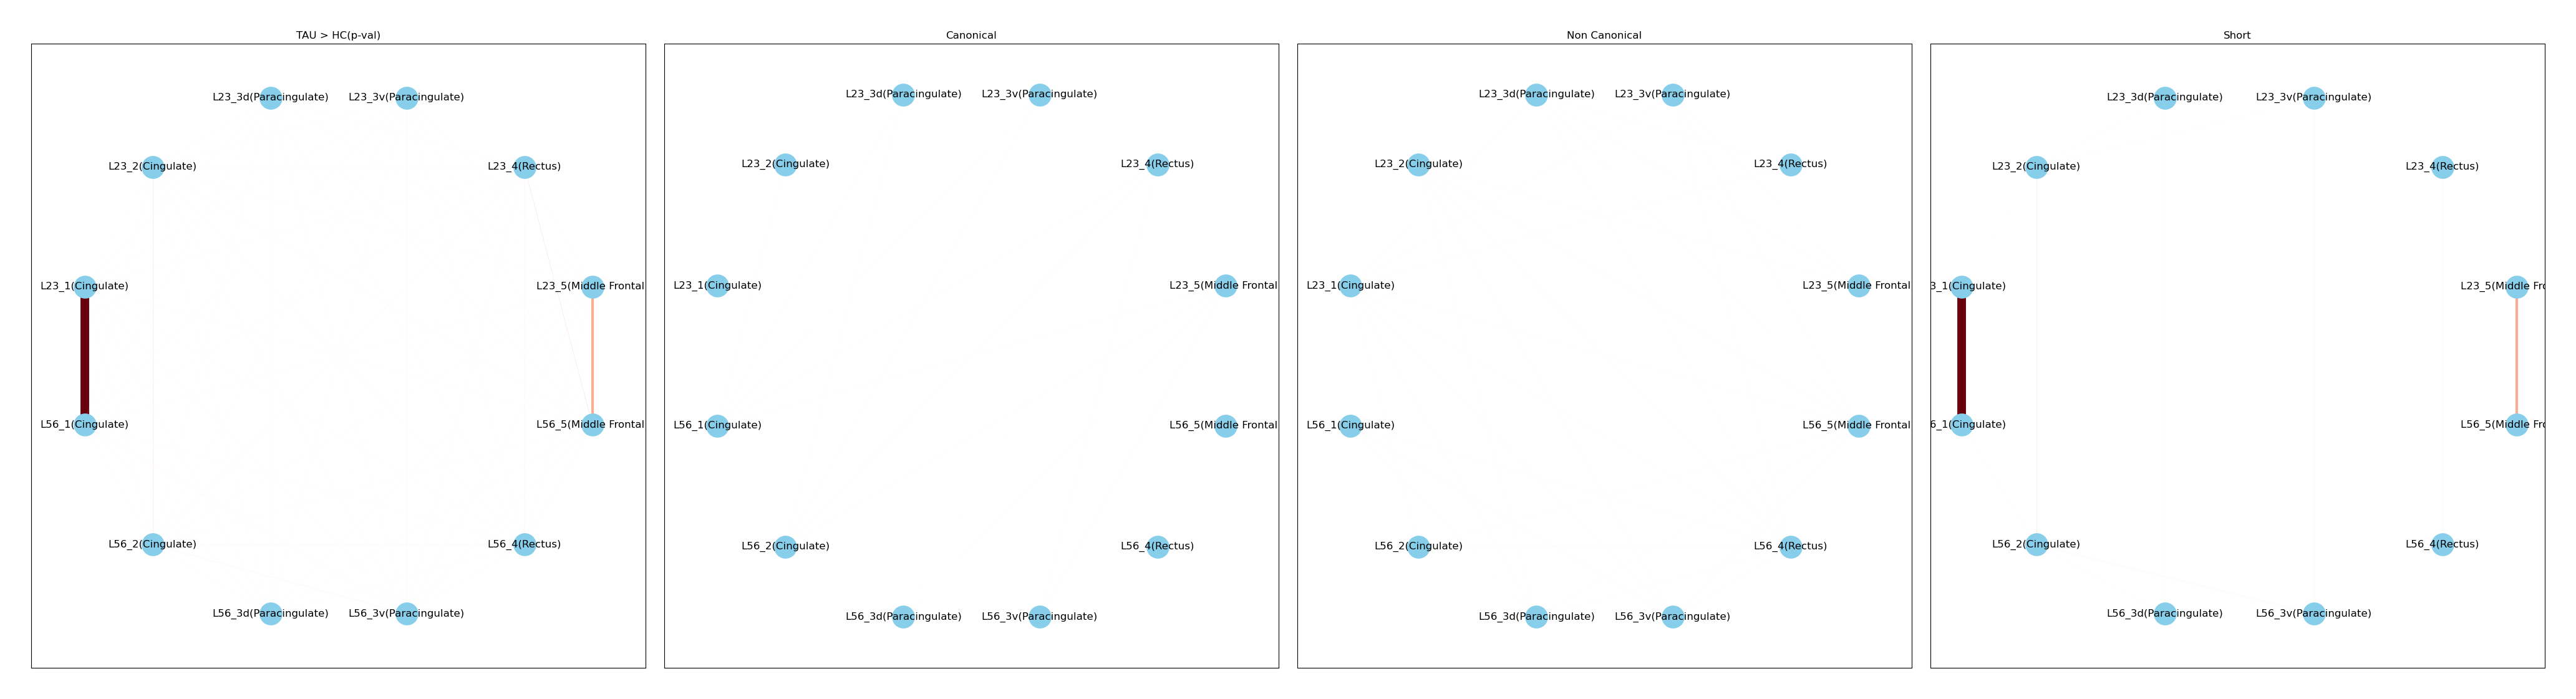

In [12]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
chordPlot(cov_dict['TAU_gt_HC_raw'], data_label, 'TAU > HC(p-val)', 'cmp', ax=axs[0])
chordPlot(cov_dict['TAU_gt_HC_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1])
chordPlot(cov_dict['TAU_gt_HC_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2])
chordPlot(cov_dict['TAU_gt_HC_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3])

plt.savefig(layer_Fig + '/NeuN_TAU > HC(p-val).png')

# Show or save the final concatenated figure
plt.show()

## HC > TDP

/var/folders/d_/hlp96bh14c98xy43dzm6gp6c0000gn/T/ipykernel_53790/2915117916.py:62: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, rotated_pos, edge_color=colors, width=10*np.abs(weights_normalized))


<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

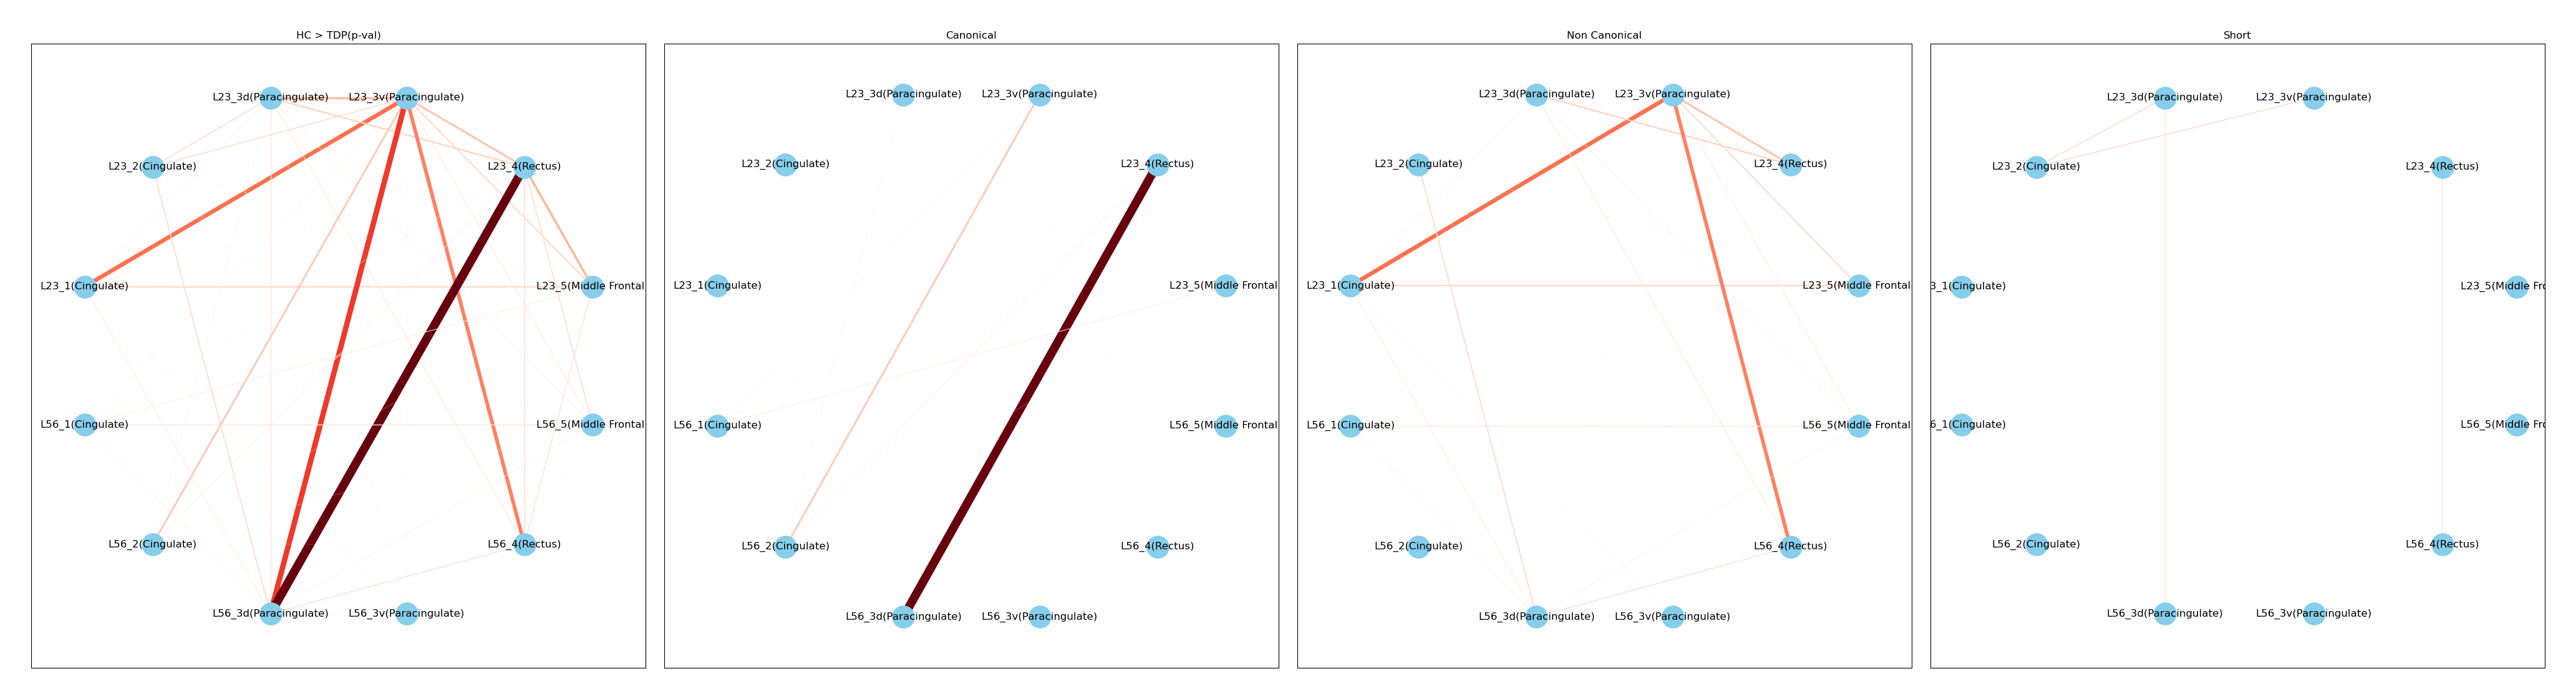

In [13]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
chordPlot(cov_dict['TDP_lt_HC_raw'], data_label, 'HC > TDP(p-val)', 'cmp', ax=axs[0])
chordPlot(cov_dict['TDP_lt_HC_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1])
chordPlot(cov_dict['TDP_lt_HC_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2])
chordPlot(cov_dict['TDP_lt_HC_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3])

plt.savefig(layer_Fig + '/NeuN_HC > TDP(p-val).png')

# Show or save the final concatenated figure
plt.show()

## TDP > HC

/var/folders/d_/hlp96bh14c98xy43dzm6gp6c0000gn/T/ipykernel_53790/2915117916.py:62: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, rotated_pos, edge_color=colors, width=10*np.abs(weights_normalized))


<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

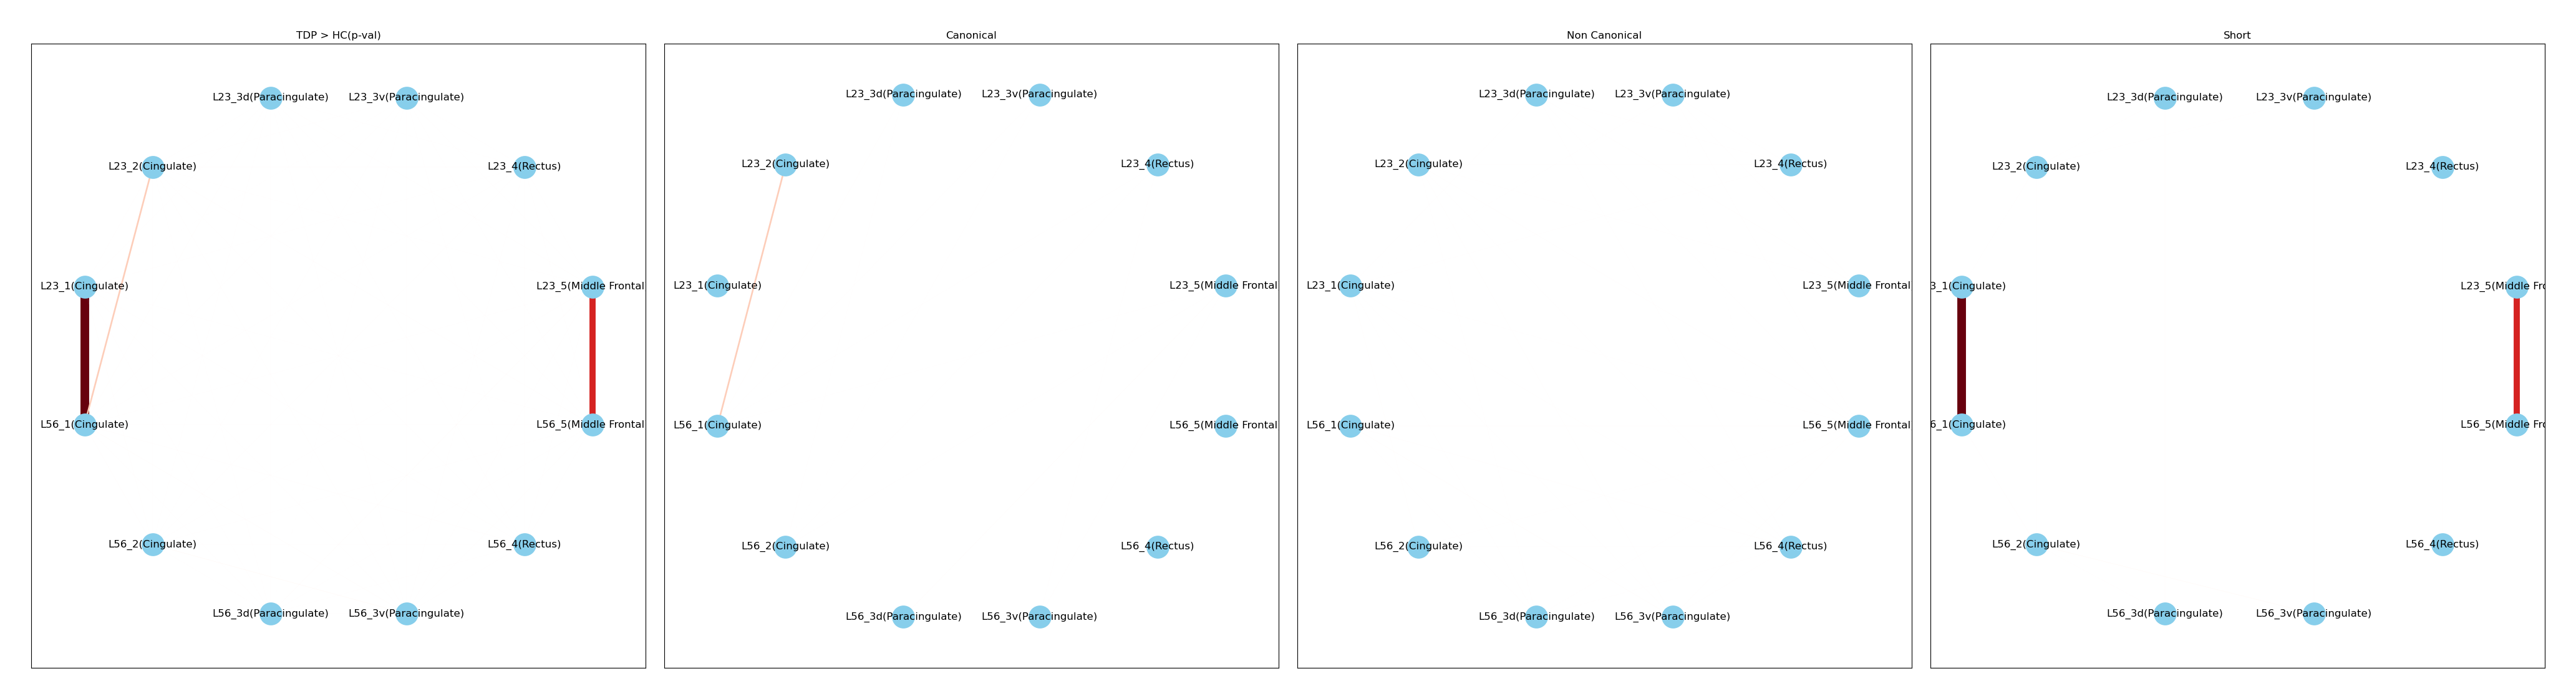

In [14]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
chordPlot(cov_dict['TDP_gt_HC_raw'], data_label, 'TDP > HC(p-val)', 'cmp', ax=axs[0])
chordPlot(cov_dict['TDP_gt_HC_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1])
chordPlot(cov_dict['TDP_gt_HC_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2])
chordPlot(cov_dict['TDP_gt_HC_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3])

plt.savefig(layer_Fig + '/NeuN_TDP > HC(p-val).png')

# Show or save the final concatenated figure
plt.show()

## TAU > TDP

/var/folders/d_/hlp96bh14c98xy43dzm6gp6c0000gn/T/ipykernel_53790/2915117916.py:62: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, rotated_pos, edge_color=colors, width=10*np.abs(weights_normalized))


<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

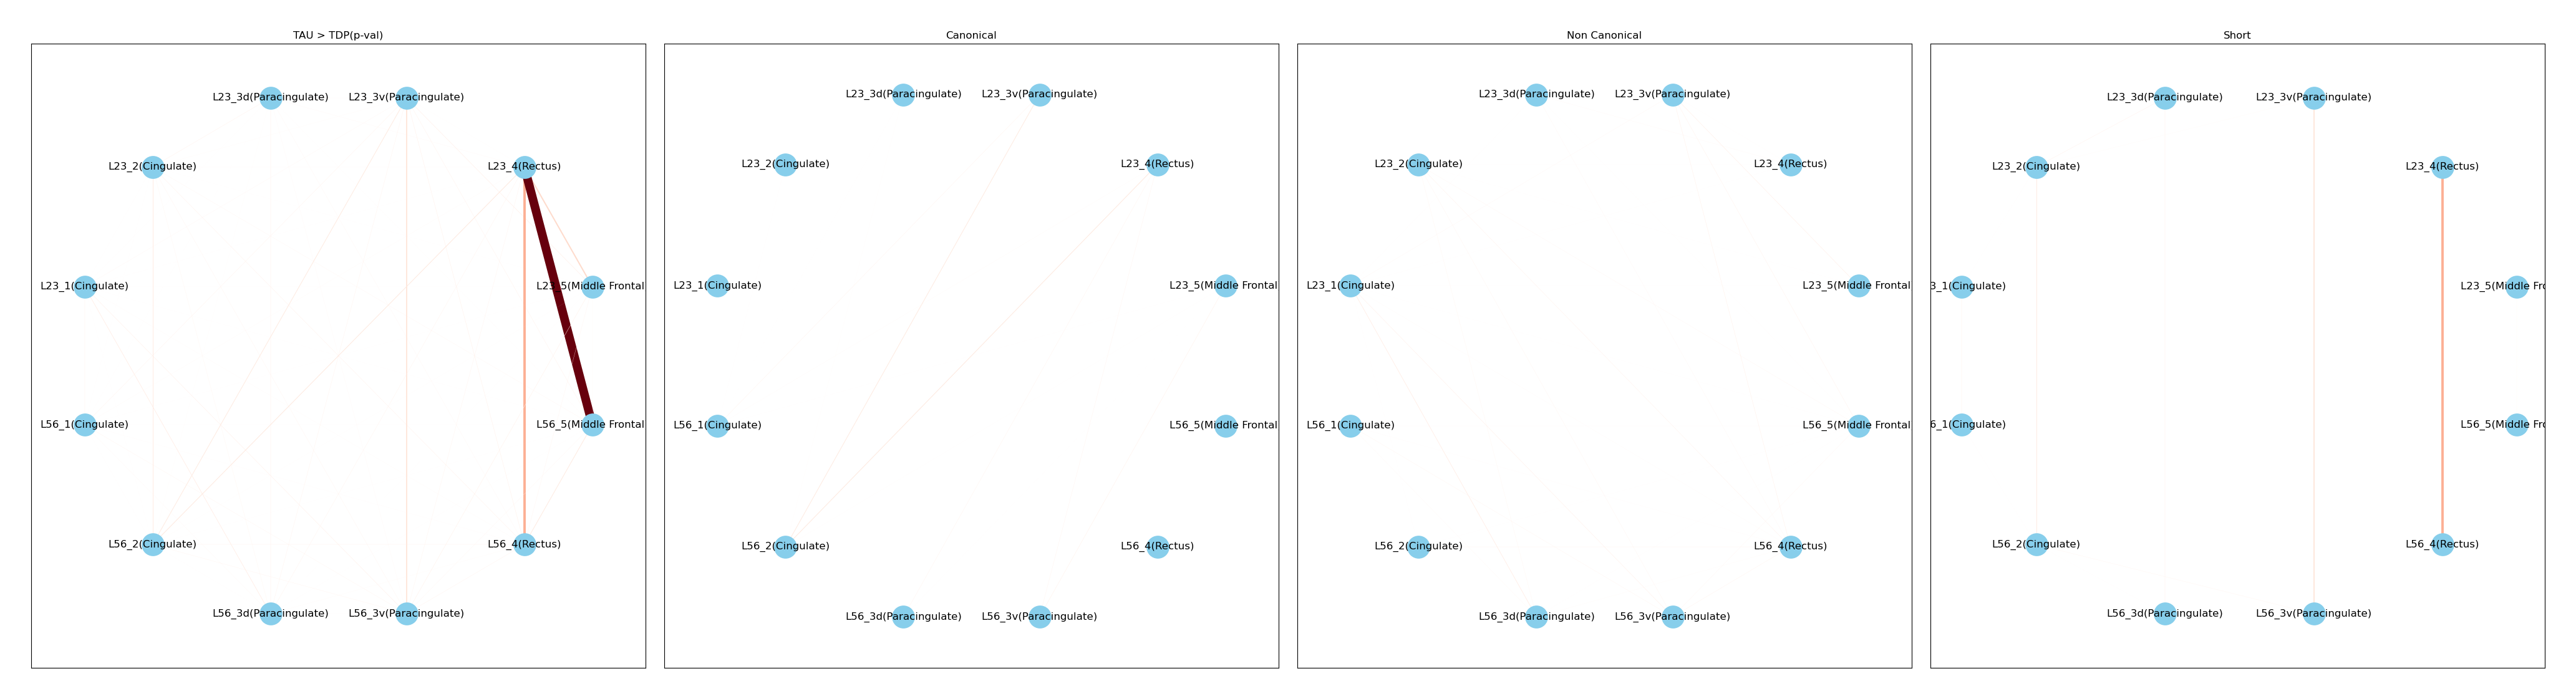

In [15]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
chordPlot(cov_dict['TAU_gt_TDP_raw'], data_label, 'TAU > TDP(p-val)', 'cmp', ax=axs[0])
chordPlot(cov_dict['TAU_gt_TDP_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1])
chordPlot(cov_dict['TAU_gt_TDP_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2])
chordPlot(cov_dict['TAU_gt_TDP_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3])

plt.savefig(layer_Fig + '/NeuN_TAU > TDP(p-val).png')

# Show or save the final concatenated figure
plt.show()

## TDP > TAU

/var/folders/d_/hlp96bh14c98xy43dzm6gp6c0000gn/T/ipykernel_53790/2915117916.py:62: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, rotated_pos, edge_color=colors, width=10*np.abs(weights_normalized))


<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

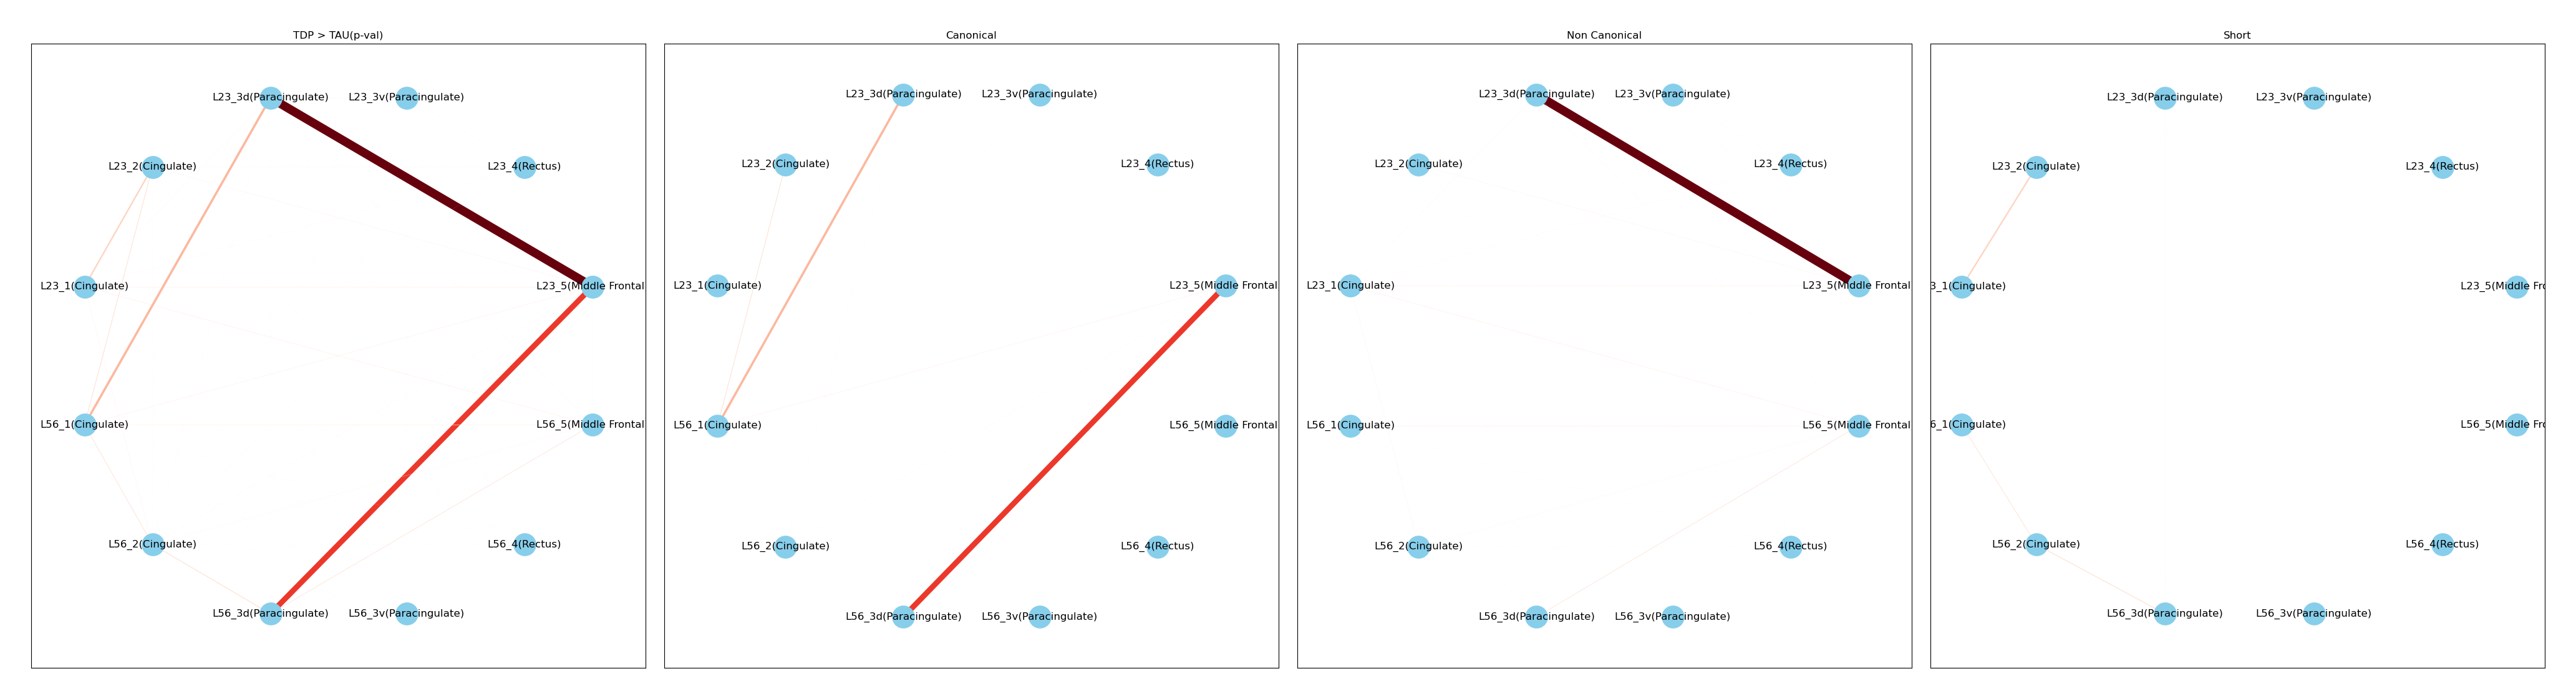

In [16]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
chordPlot(cov_dict['TDP_gt_TAU_raw'], data_label, 'TDP > TAU(p-val)', 'cmp', ax=axs[0])
chordPlot(cov_dict['TDP_gt_TAU_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1])
chordPlot(cov_dict['TDP_gt_TAU_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2])
chordPlot(cov_dict['TDP_gt_TAU_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3])

plt.savefig(layer_Fig + '/NeuN_TDP > TAU(p-val).png')

# Show or save the final concatenated figure
plt.show()